#The aim!

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import pandas as pd
from mpld3 import plugins, utils


class LinkedView(plugins.PluginBase):
    """A simple plugin showing how multiple axes can be linked"""

    JAVASCRIPT = """
    mpld3.register_plugin("linkedview", LinkedViewPlugin);
    LinkedViewPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LinkedViewPlugin.prototype.constructor = LinkedViewPlugin;
    LinkedViewPlugin.prototype.requiredProps = ["idpts", "idline", "data"];
    LinkedViewPlugin.prototype.defaultProps = {}
    function LinkedViewPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LinkedViewPlugin.prototype.draw = function(){
      var pts = mpld3.get_element(this.props.idpts);
      var line = mpld3.get_element(this.props.idline);
      var data = this.props.data;

      function mouseover(d, i){
        line.data = data[i];
        line.elements().transition()
            .attr("d", line.datafunc(line.data))
            .style("stroke", this.style.fill);
      }
      pts.elements().on("mouseover", mouseover);
    };
    """

    def __init__(self, points, line, linedata):
        if isinstance(points, matplotlib.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "linkedview",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "data": linedata}

fig, ax = plt.subplots(2)

# scatter periods and amplitudes
np.random.seed(0)
P = 0.2 + np.random.random(size=20)
A = np.random.random(size=20)
x = np.linspace(0, 10, 100)

data = np.array([[x, Ai * np.sin(x / Pi)] for (Ai, Pi) in zip(A, P)])
points = ax[1].scatter(P, A, c=P + A,
                       s=200, alpha=0.5)

ax[1].set_xlabel('Period')
ax[1].set_ylabel('Amplitude')

# create the line object
lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
ax[0].set_ylim(-1, 1)

ax[0].set_title("Hover over points to see lines")

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()
plugins.connect(fig, LinkedView(points, lines[0], linedata))

labels = ["Point {0}".format(i) for i in range(20)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)

mpld3.display()

# HACK this motherfucker

In [3]:
# Basic script to run network state classfication
from loadSeizureData  import LoadSeizureData
from classifierTester import ClassifierTester
from basicFeatures    import BasicFeatures
from randomForestClassifier import RandomForest
from freqfeatures     import FreqFeatures

dirpath = '/Users/Jonathan/Documents/PhD /Seizure_related/Network_states/VMData/Classified'
dataobj = LoadSeizureData(dirpath)
dataobj.load_data()
basicStatsExtractor = BasicFeatures()
dataobj.extract_feature_array([basicStatsExtractor])

here2


In [4]:
%matplotlib inline
from sklearn.preprocessing import normalize
norm_array = normalize(dataobj.data_array, axis = 1)
x2 = norm_array[:,:].reshape((301,1,5120))
print x2.shape


(301, 1, 5120)


(301, 2, 2560)


AttributeError: 'module' object has no attribute 'LinkedView'

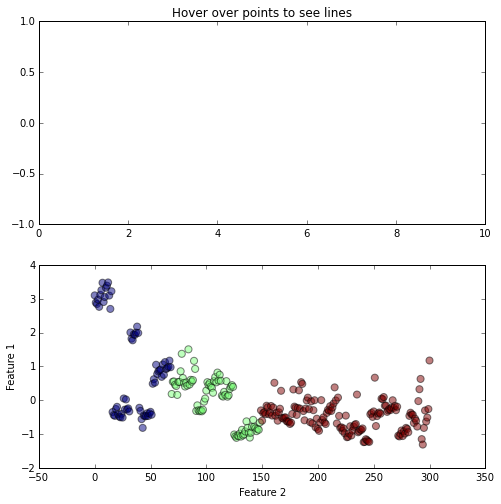

In [11]:
#%matplotlib qt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import pandas as pd
from mpld3 import plugins, utils

fig = plt.figure(figsize = (8,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# scatter periods and amplitudes
np.random.seed(0)
P = 0.2 + np.random.random(size=301)
A = np.random.random(size=301)
x = np.linspace(0, 10, 5120/2.)

data = np.array([[x, Ai * np.sin(x / Pi)] for (Ai, Pi) in zip(A, P)])
data[:,1,:] = x2[:,0,::2]*20
print data.shape
A = np.random.randn(301)
A = dataobj.features[:,3]
P = np.arange(301)

points = ax2.scatter(P, A, s =50, alpha=0.5, c = dataobj.label_colarray)
#points = radviz2(df,'Network States',dataobj, ax = ax, color = cmap, edgecolor = 'white')
ax2.set_xlabel('Feature 2')
ax2.set_ylabel('Feature 1')

# create the line object
lines = ax1.plot(x, 0 * x, '-w', lw=1, alpha=0.8)
ax1.set_ylim(-1, 1)

ax1.set_title("Hover over points to see lines")

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()


labels = ["Trace {0}".format(i) for i in range(301)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig,tooltip, plugins.LinkedView(points, lines[0], linedata))


mpld3.display()

# Attempt to get the above working with radviz
 And then colours and subplot axes etc


In [11]:
df = pd.DataFrame(dataobj.features, columns = ['kurtosis','skew','variation','coastline'])
df['Network States'] = dataobj.label_colarray

In [36]:
def radviz2(frame, class_column,dataobj, ax=None, color=None, colormap=None, **kwds):
    """RadViz - a multivariate data visualization algorithm
    Parameters:
    -----------
    frame: DataFrame
    class_column: str
        Column name containing class names
    ax: Matplotlib axis object, optional
    color: list or tuple, optional
        Colors to use for the different classes
    colormap : str or matplotlib colormap object, default None
        Colormap to select colors from. If string, load colormap with that name
        from matplotlib.
    kwds: keywords
        Options to pass to matplotlib scatter plotting method
    Returns:
    --------
    ax: Matplotlib axis object
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    def normalize(series):
        a = min(series)
        b = max(series)
        return (series - a) / (b - a)

    n = len(frame)
    classes = frame[class_column].drop_duplicates()
    class_col = frame[class_column]
    df = frame.drop(class_column, axis=1).apply(normalize)

    if ax is None:
        ax = plt.gca(xlim=[-1, 1], ylim=[-1, 1])

    to_plot = {}

    for kls in classes:
        to_plot[kls] = [[], []]

    m = len(frame.columns) - 1
    s = np.array([(np.cos(t), np.sin(t))
                  for t in [2.0 * np.pi * (i / float(m))
                            for i in range(m)]])

    for i in range(n):
        row = df.iloc[i].values
        row_ = np.repeat(np.expand_dims(row, axis=1), 2, axis=1)
        y = (s * row_).sum(axis=0) / row.sum()
        kls = class_col.iat[i]
        to_plot[kls][0].append(y[0])
        to_plot[kls][1].append(y[1])
    print to_plot.keys()
    print kls, 'is kls'
    for i, kls in enumerate(classes):
        print i
        print classes
        ax.scatter(to_plot[kls][0], to_plot[kls][1], c = 'b', **kwds)

    ax.add_patch(patches.Circle((0.0, 0.0), radius=1.0, facecolor='none'))

    for xy, name in zip(s, df.columns):

        ax.add_patch(patches.Circle(xy, radius=0.025, facecolor='gray'))

        if xy[0] < 0.0 and xy[1] < 0.0:
            ax.text(xy[0] - 0.025, xy[1] - 0.025, name,
                    ha='right', va='top', size='small')
        elif xy[0] < 0.0 and xy[1] >= 0.0:
            ax.text(xy[0] - 0.025, xy[1] + 0.025, name,
                    ha='right', va='bottom', size='small')
        elif xy[0] >= 0.0 and xy[1] < 0.0:
            ax.text(xy[0] + 0.025, xy[1] - 0.025, name,
                    ha='left', va='top', size='small')
        elif xy[0] >= 0.0 and xy[1] >= 0.0:
            ax.text(xy[0] + 0.025, xy[1] + 0.025, name,
                    ha='left', va='bottom', size='small')

    ax.axis('equal')
    return ax

In [38]:
%matplotlib inline
#from pandas.tools.plotting import radviz
import seaborn as sns
cmap =  sns.color_palette()
plt.figure(figsize = (10,7))
ax = plt.subplot(111)
radviz2(df,'Network States',dataobj, ax = ax, edgecolor = 'white')
#ax.legend(frameon = False)
ax.axis('off')
#legend = ax.legend(title = 'Network States')
#plt.setp(legend.get_title(),fontsize=15)

#ax.legend( loc='center left', bbox_to_anchor=(0, 1),fontsize='medium', fancybox=True, ncol=3 )
ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))#, emit=True, auto=False )
#ax.set_title( 'Radviz visualisation of feature matrix', loc='Center' )
for text in ax.texts:
    text.set_size(15)
mpld3.display()
#plt.savefig('radviz.png')
#plt.show()

[1, 2, 3]
3 is kls
0
0      1
69     2
149    3
Name: Network States, dtype: int64
1
0      1
69     2
149    3
Name: Network States, dtype: int64
2
0      1
69     2
149    3
Name: Network States, dtype: int64


In [ ]:
    print to_plot

(301, 5120)


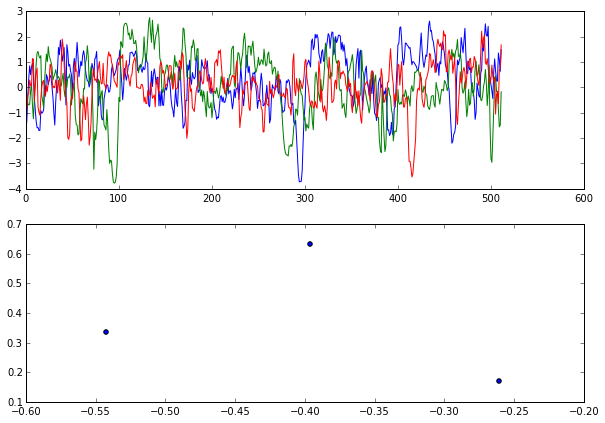

In [32]:
%matplotlib inline
fig = plt.figure(figsize = (10,7))
ax1 = plt.subplot(2,1,1)
ax1.plot(dataobj.data_array[:3,:512].T)
print dataobj.data_array.shape

ax2 = plt.subplot(2,1,2)
ax2.scatter(dataobj.features[:3,0],dataobj.features[:3,1])

#plugins.connect(fig, HighlightLines(lines))

#mpld3.display()

In [7]:
class HighlightLines(plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg); })
             .on("mouseout", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg); });
      }
    };
    """

    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}